<a href="https://colab.research.google.com/github/nagasai-dev/Role-of-AI-and-ML-in-Bio-Medical-Engineering/blob/main/ECG_ARRHYTHMIA_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understand the Problem


🫀 **What’s ECG?**
An Electrocardiogram (ECG) measures the electrical signals of the heart. Think of it like a heartbeat graph.

❤️ **What’s Arrhythmia?**
An arrhythmia is an irregular heartbeat. Some are harmless, some dangerous.

🤖 **Why ML?**
AI can look at the patterns in the ECG and tell us if something's wrong - sometimes faster and more accurately than doctors.

# Working with ECG Data

**Load and Visualize Real ECG Data**


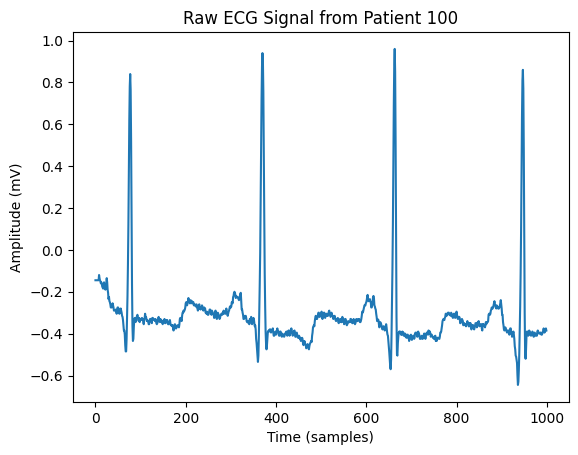

In [ ]:
import wfdb
import matplotlib.pyplot as plt

# Download a sample record (takes ~10s)
record = wfdb.rdrecord('100', sampto=1000, pn_dir='mitdb')
annotation = wfdb.rdann('100', 'atr', pn_dir='mitdb')

# Plot ECG signal
plt.plot(record.p_signal[:1000, 0])  # Show 1000 samples from channel 0
plt.title('Raw ECG Signal from Patient 100')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (mV)')
plt.show()

# Extracting Individual Heartbeats

**Slice ECG Beats for ML**

In [ ]:
import numpy as np

# Get R-peaks and labels
r_peaks = annotation.sample
labels = annotation.symbol

# Extract ~200 samples around each R-peak (e.g., 100 before + 100 after)
beats = []
for peak in r_peaks:
    if peak > 100 and peak < len(record.p_signal)-100:
        beat = record.p_signal[peak-100:peak+100, 0]
        beats.append(beat)

beats = np.array(beats)
print(beats.shape)  # (num_beats, 200)

(2, 200)


# Building a Machine Learning Model

**Train Your First Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Fake labels for now (real ones need processing)
y = np.random.choice([0, 1], size=len(beats))  # 0 = normal, 1 = abnormal

X_train, X_test, y_train, y_test = train_test_split(beats, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

